# Homework 11

**Enter your Name:**  Thomas Lu
    
**Enter your PID:**  thomaslu
    
I have neither given nor received unauthorized assistance on this assignment.

In [1]:
# Run this cell first.  Do NOT edit this cell.
Answer1 = Answer2 = Answer3 = Answer4 = Answer5 = None
import pandas
import numpy
import matplotlib.pyplot
import sklearn.manifold
import nose.tools
%matplotlib inline
# Data files:
data = pandas.read_csv('VT_tweets_2018_100K.csv').sort_values('datetime')
stopwords = set(open("stop-word-list.txt").read().splitlines())


**Problem 1.** Process the above VT tweets dataset to produce a Vector-Space-Model doc x word matrix of TFIDF values, with the following properties:

* A "document" is all the tweets on a given date.  Thus, documents represent dates.
* Change all capitalization to lowercase. Before splitting the words, clean the text of these 17 punctuation marks `.,!?:;"'-~()[]|/\` by replacing each with the space character.
* The vocabulary should include only words that satisfy string.isalpha(), and not include any words in the stop-word-list.
* Eliminate any words from the vocabulary that have total term frequency (TF) <= 5.  Such words are usually bogus words.
* Use TFIDF definition as discussed in class. Use natural $log_e$. Be careful not to use integer division!
* You may use TFIDF={NaN or 0.0} where TF=0 (but if TF>0, then you must use TFIDF>=0.0).
* Create the TFIDF table sorted and indexed by Date.
* Sort the column labels (words) of the TFIDF table in ascending order.

Hint, you might find these useful: pandas.Series.value-counts(), pandas.Series.apply().

In Answer1, return the TFIDF table.

In [2]:
## Problem 1
# YOUR CODE HERE
#raise NotImplementedError()
data['date'] = data.datetime.str.slice(0,10)
g = data.groupby('date')
tweets = g.tweet.aggregate(' '.join)
tweets = tweets.str.lower()
for p in ".,!?:;\"'-~()[]/\\":
    tweets = tweets.str.replace(p,' ')
tweets = tweets.apply(lambda t:
                       [w for w in t.split() if w.isalpha() and w not in stopwords]  )
TF = tweets.apply(lambda bag: pandas.Series(bag).value_counts())
TF = TF[TF.columns[TF.sum()>5]]
IDF = numpy.log( float(len(TF))/TF.count() )
TFIDF = TF * IDF
TFIDF = TFIDF.reindex(sorted(TFIDF.columns), axis = 1)
Answer1 = TFIDF
Answer1
#Answer1

,aa,aaa,aaaaaa,aac,aacrao,aaron,ab,abc,abdde,abducting,...,zioqwumckl,zip,znxrgudywz,zohn,zone,zones,zoom,zoot,zstfebjacb,zusjuzybce
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,NaN,NaN,NaN,4.661512,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.376329,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.904146,NaN,NaN
2018-01-03,NaN,NaN,NaN,2.330756,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.141172,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,8.671115,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-07,1.974081,NaN,NaN,NaN,5.780744,1.974081,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,1.974081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,19.068323,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN,5.780744,NaN,3.423434,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.653780,NaN,NaN,NaN,NaN


In [3]:
# Problem 1 autograder -- run me
nose.tools.assert_is_instance(Answer1, pandas.DataFrame)
nose.tools.assert_tuple_equal(Answer1.shape, (72, 7336))
nose.tools.assert_true(Answer1.index.is_monotonic_increasing)
nose.tools.assert_list_equal(list(Answer1.columns)[:10],
    ['aa', 'aaa', 'aaaaaa', 'aac', 'aacrao', 'aaron', 'ab', 'abc', 'abdde', 'abducting'])
for (a,b) in zip(list(Answer1.arrest[29:33])+[Answer1.arrest[36]], 
                 [69.34793337113082, 106.68912826327819, 24.00505385923759, 18.670597446073685, 2.667228206581955]):
    nose.tools.assert_almost_equal(a, b, delta=0.0001)
for a in list(Answer1.arrest[0:29])+list(Answer1.arrest[37:]):
    nose.tools.assert_true(a==0.0 or numpy.isnan(a))
# autograder hidden tests
'passed'

'passed'

**Problem 2.** Compare TF to TFIDF. 

In Answer2, return a 2-tuple containing a Series of the total TF for each word, and a Series with the total TFIDF for each word.  Each Series should contain frequencies in decending order, and indexed by words in the vocabulary.

Think:  Where are the top TF terms in the TFIDF list? Which set of top terms are more interesting?  

In [4]:
# Problem 2
# YOUR CODE HERE
#raise NotImplementedError()
compare_tf_tfidf = (TF.sum().sort_values(ascending = False), TFIDF.sum().sort_values(ascending=False))
Answer2 = compare_tf_tfidf
Answer2

(rt                         89831.0
 virginia                   76019.0
 tech                       69974.0
 t                          49226.0
 https                      43534.0
 ap                         13516.0
 texas                      12514.0
 west                       12148.0
 michigan                   12078.0
 s                          12062.0
 st                         10027.0
 vegas                       9624.0
 time                        9305.0
 new                         9093.0
 hook                        8299.0
 beat                        8275.0
 las                         7337.0
 shooting                    6636.0
 sandy                       6367.0
 state                       6215.0
 season                      6065.0
 shootings                   6058.0
 college                     5781.0
 wichita                     5690.0
 student                     5438.0
 parkland                    5390.0
 vs                          5255.0
 basketball                 

In [5]:
# Problem 2 autograder -- run me
nose.tools.assert_is_instance(Answer2, tuple)
nose.tools.assert_equal(len(Answer2), 2)
nose.tools.assert_is_instance(Answer2[0], pandas.Series)
nose.tools.assert_is_instance(Answer2[1], pandas.Series)
nose.tools.assert_true(Answer2[0].is_monotonic_decreasing)
nose.tools.assert_true(Answer2[1].is_monotonic_decreasing)
nose.tools.assert_list_equal(list(Answer2[0].index)[:6],
    ['rt', 'virginia', 'tech', 't', 'https', 'ap'])
nose.tools.assert_list_equal(list(Answer2[1].index)[:6],
    ['tds', 'arians', 'rushing', 'parkland', 'bruce', 'mi'])
nose.tools.assert_almost_equal(Answer2[0].virginia, 76019, delta=0.0001)
nose.tools.assert_almost_equal(Answer2[1].parkland, 5286.669674, delta=0.0001)
# autograder hidden tests
'passed'

'passed'

**Problem 3.** The Important Word of the Day. 

In Answer3, return a DataFrame indexed by date that contains the top TFIDF word for each date, and their associated TFIDF values.

In [6]:
# Problem 3
# YOUR CODE HERE
#raise NotImplementedError()
Answer3 = pandas.DataFrame({"Word": TFIDF.idxmax(axis=1), 'TFIDF': TFIDF.max(axis =1)}, columns= ['Word','TFIDF'] )
Answer3

,Word,TFIDF
date,,
2018-01-01,tds,672.936229
2018-01-02,tds,5576.429588
2018-01-03,tds,668.230381
2018-01-04,served,591.176773
2018-01-05,unfini,838.984436
2018-01-06,unfini,230.967480
2018-01-07,sundays,511.025670
2018-01-08,wichita,1511.060854
2018-01-09,gators,1254.688386


In [7]:
# Problem 3 autograder -- run me
nose.tools.assert_is_instance(Answer3, pandas.DataFrame)
nose.tools.assert_tuple_equal(Answer3.shape, (72,2))
nose.tools.assert_list_equal(list(Answer3.columns), ['Word','TFIDF'])
nose.tools.assert_true(Answer3.index.is_monotonic_increasing)
nose.tools.assert_equal(Answer3.Word.iloc[0], 'tds')
nose.tools.assert_almost_equal(Answer3.TFIDF.iloc[0], 672.936229, delta=0.0001)
# autograder hidden tests
'passed'

'passed'

**Problem 4.**  Draw a timeseries plot of the TFIDF usage of the words "parkland" and "trump".

In Answer4, return a Series containing the "parkland" timeseries TFIDF data.

Think: What happened on those peak days?

date
2018-01-01            NaN
2018-01-02            NaN
2018-01-03            NaN
2018-01-04            NaN
2018-01-05            NaN
2018-01-06            NaN
2018-01-07            NaN
2018-01-08            NaN
2018-01-09            NaN
2018-01-10            NaN
2018-01-11            NaN
2018-01-12            NaN
2018-01-13            NaN
2018-01-14            NaN
2018-01-15            NaN
2018-01-16            NaN
2018-01-17            NaN
2018-01-18            NaN
2018-01-19            NaN
2018-01-20            NaN
2018-01-21            NaN
2018-01-22            NaN
2018-01-23            NaN
2018-01-24            NaN
2018-01-25            NaN
2018-01-26            NaN
2018-01-27            NaN
2018-01-28            NaN
2018-01-29            NaN
2018-01-30            NaN
                 ...     
2018-02-12            NaN
2018-02-13            NaN
2018-02-14            NaN
2018-02-15    1365.314320
2018-02-16    1639.946511
2018-02-17      28.444048
2018-02-18     154.971022
2018-02

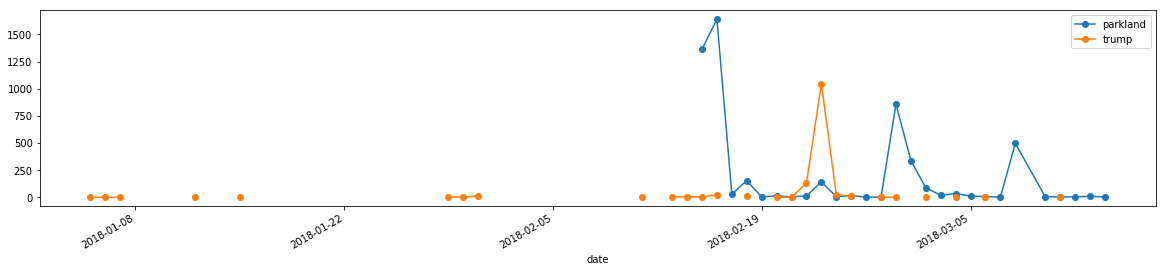

In [8]:
# Problem 4
# YOUR CODE HERE
#raise NotImplementedError()
TFIDF_copy = TFIDF.copy()
TFIDF_copy.index = pandas.to_datetime(TFIDF_copy.index)
TFIDF_copy[['parkland','trump']].plot(legend=True, marker='o', figsize=(20,4))
hello = numpy.array(TFIDF_copy['parkland'])
Answer4 = pandas.Series(data = hello, index = TFIDF_copy.index)
Answer4

In [9]:
# Problem 4 autograder -- run me
nose.tools.assert_is_instance(Answer4, pandas.Series)
nose.tools.assert_equal(len(Answer4), 72)
nose.tools.assert_true(Answer4.index.is_monotonic_increasing)
nose.tools.assert_true(Answer4.iloc[0]==0.0 or numpy.isnan(Answer4.iloc[0]))
nose.tools.assert_almost_equal(Answer4.iloc[46], 1639.9465110356061, delta=0.0001)
# autograder hidden tests
'passed'

'passed'

**Problem 5.** Investigate similarities between dates.
From the TFIDF matrix, compute the Cosine Similarity matrix of dates.
Use MDS to make a 2D scatterplot of the dates based on their pairwise Cosine Distances. Label the dots in the plot with their "m-dd" dates.

`Cosine_Distance = 1 - Cosine_Similarity`

Use these 'precomputed' cosine distances in MDS and initialize MDS with parameters `n_init=10` and `max_iter=1000`.

In Answer5, return the Cosine Similarity matrix.

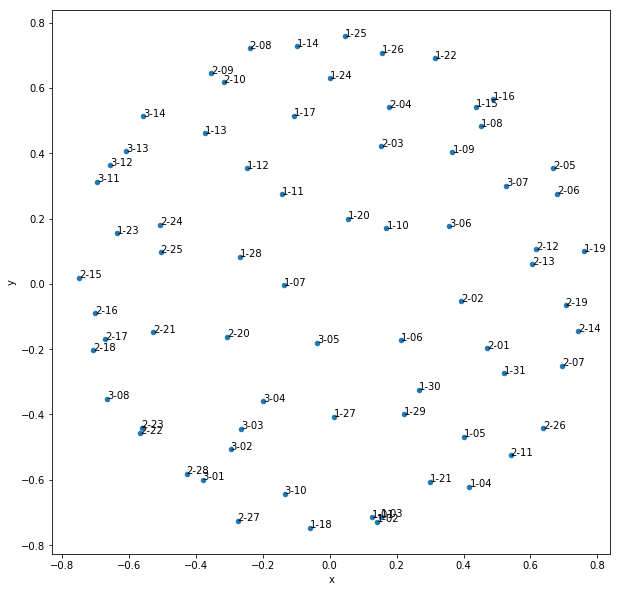

In [12]:
# Problem 5
# YOUR CODE HERE
#raise NotImplementedError()
TFIDF
# Normalize docs
docmags = numpy.sqrt((TFIDF*TFIDF).sum(axis=1))
#nTFIDF = TFIDF / docmags  
nTFIDF = TFIDF.divide(docmags, axis=0)
nTFIDF = nTFIDF.fillna(0.0)

# Compute cosine similarity matrix
cosSim = nTFIDF.dot(nTFIDF.transpose())
cosDist = 1 - cosSim

# MDS plot
mds = sklearn.manifold.MDS(n_components=2, 
    dissimilarity='precomputed', n_init=10, max_iter=1000)
dr = mds.fit_transform(cosDist) 
dr = pandas.DataFrame(dr, columns=['x','y'], index=TFIDF.index)
ax = dr.plot.scatter(x='x', y='y', figsize=(10,10))
for i in range(0,len(TFIDF)):
    ax.text(dr.x[i], dr.y[i], TFIDF.index[i][6:])

Answer5 = cosSim

In [13]:
# Problem 5 autograder -- run me
nose.tools.assert_is_instance(Answer5, pandas.DataFrame)
nose.tools.assert_tuple_equal(Answer5.shape, (72,72))
nose.tools.assert_true(Answer5.index.is_monotonic_increasing)
nose.tools.assert_true(Answer5.columns.is_monotonic_increasing)
for i in range(len(Answer5)):
    nose.tools.assert_almost_equal(Answer5.iloc[i,i], 1.0, delta=0.0001)
nose.tools.assert_almost_equal(Answer5.iloc[1,0], 0.919173, delta=0.0001)
nose.tools.assert_almost_equal(Answer5.iloc[0,1], 0.919173, delta=0.0001)
# autograder hidden tests
'passed'

'passed'

In [ ]:
# scratch space
